In [16]:
import pandas as pd
import numpy as np

In [17]:
symbol_prices = pd.read_csv('../out/symbols_prices.csv', sep=';', encoding='utf-8')

In [18]:
symbol_prices.Symbol.value_counts()

Symbol
BTCEUR     744
ETHEUR     744
DOGEEUR    744
Name: count, dtype: int64

In [19]:
# # Functions

# # Calculer l'evolution 
# def get_percentage_change_for_period(df, period):
#     y = df['close'].shift(-period).pct_change(period)
#     y.dropna(inplace=True)
#     y.name = 'period_close_future_pct'
#     return y


# # Calculer les moyennes mobiles et exponentielles sur n jours
# def get_sma_ema_indicators(df):
#    df_sma_ema=pd.DataFrame()
   
#    for n in [5,14,30,60,180,365]:
#        df_sma_ema["sma_"+str(n)]=(df['close'].rolling(window=n).mean())/df['close']
#        df_sma_ema["ema_"+str(n)]=pd.Series(df['close'].ewm(span=n,min_periods=n).mean())/df['close']
#    return df_sma_ema


# # Calculer l'evolution du volume
# def get_volume(df):
#    df_volume=pd.DataFrame()
#    df_volume['volume_1d_change']=df['volume'].pct_change()
#    df_volume['volume_5d_change_sma']=(df_volume['volume_1d_change'].rolling(window=10).mean())
#    return df_volume


# # Calculer l'indice de force relative (<50 impact négatif, >50 impact positif)
# def score_rsi(series,period):
#    delta=series.diff().dropna()
#    u=delta*0
#    d=u.copy()
#    u[delta>0]=delta[delta>0]
#    d[delta<0]=-delta[delta<0]
#    u[u.index[period-1]]=np.mean(u[:period])
#    u=u.drop(u.index[:(period-1)])
#    d[d.index[period-1]]=np.mean(d[:period])
#    d=d.drop(d.index[:(period-1)])
#    rs=u.ewm(com=period-1,adjust=False).mean()/d.ewm(com=period-1,adjust=False).mean()
#    return 100-100/(1+rs)

# # Calculer le rsi 
# def get_rsi(df):
#    df_rsi=pd.DataFrame()
#    for n in [5,14,30,60,180,365]:
#        df_rsi['rsi_'+str(n)]=score_rsi(df['high'],n)
       
#    return df_rsi

In [20]:
# Workflow to complete

# percentage_change_5_days = get_percentage_change_for_period(symbol_price, 10)
# sma_ema = get_sma_ema_indicators(symbol_price)
# volume = get_volume(symbol_price)
# rsi = get_rsi(symbol_price)

In [50]:
# Application du workflow

# for symbol in list(symbol_prices.Symbol.unique()):
#     symbol_price =  symbol_prices[symbol_prices.Symbol == symbol]
    
#     percentage_change_5_days = get_percentage_change_for_period(symbol_price, 10)
#     sma_ema = get_sma_ema_indicators(symbol_price)
#     volume = get_volume(symbol_price)
#     rsi = get_rsi(symbol_price)

In [21]:
import pandas as pd
import numpy as np
np.float_ = np.float64
from prophet import Prophet



In [22]:
pip install numpy<2

/bin/bash: 2: No such file or directory
Note: you may need to restart the kernel to use updated packages.


In [52]:
df_btc = symbol_prices[symbol_prices.Symbol == 'BTCEUR'][['timestamp','close']]
df_btc = df_btc.rename(columns={'timestamp': 'ds', 'close': 'y'})
df_btc[df_btc['ds']=="2024-07-29"]

,ds,y
743,2024-07-29,64215.07


In [23]:
m = Prophet()
m.fit(df_btc)

13:23:40 - cmdstanpy - INFO - Chain [1] start processing
13:23:40 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
# Python
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
829,2024-10-23
830,2024-10-24
831,2024-10-25
832,2024-10-26
833,2024-10-27


In [25]:
# Python
forecast = m.predict(future)
forecast.tail(9)



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
825,2024-10-19,67986.068734,59485.417491,65492.628600,66860.109951,69214.587425,-5357.124910,-5357.124910,-5357.124910,-75.573656,-75.573656,-75.573656,-5281.551254,-5281.551254,-5281.551254,0.0,0.0,0.0,62628.943824
826,2024-10-20,68069.224551,59832.997089,66227.827540,66909.022912,69334.631424,-5094.375685,-5094.375685,-5094.375685,-29.157118,-29.157118,-29.157118,-5065.218567,-5065.218567,-5065.218567,0.0,0.0,0.0,62974.848866
827,2024-10-21,68152.380368,60438.395756,66682.895091,66972.028865,69436.759396,-4682.946095,-4682.946095,-4682.946095,170.884129,170.884129,170.884129,-4853.830224,-4853.830224,-4853.830224,0.0,0.0,0.0,63469.434272
828,2024-10-22,68235.536185,60228.157828,66681.200882,67022.769405,69537.829205,-4668.323565,-4668.323565,-4668.323565,-17.425579,-17.425579,-17.425579,-4650.897985,-4650.897985,-4650.897985,0.0,0.0,0.0,63567.212620
829,2024-10-23,68318.692001,60619.705797,67237.159848,67082.557541,69643.261073,-4415.050464,-4415.050464,-4415.050464,44.750003,44.750003,44.750003,-4459.800466,-4459.800466,-4459.800466,0.0,0.0,0.0,63903.641538
830,2024-10-24,68401.847818,60963.027890,67279.434152,67130.359598,69758.089847,-4333.609150,-4333.609150,-4333.609150,-49.901236,-49.901236,-49.901236,-4283.707914,-4283.707914,-4283.707914,0.0,0.0,0.0,64068.238668
831,2024-10-25,68485.003635,61090.187032,67435.736048,67191.418932,69871.550369,-4169.087721,-4169.087721,-4169.087721,-43.576543,-43.576543,-43.576543,-4125.511178,-4125.511178,-4125.511178,0.0,0.0,0.0,64315.915914
832,2024-10-26,68568.159452,61180.815844,67921.383665,67244.318066,69967.609782,-4063.330232,-4063.330232,-4063.330232,-75.573656,-75.573656,-75.573656,-3987.756577,-3987.756577,-3987.756577,0.0,0.0,0.0,64504.829219
833,2024-10-27,68651.315268,61456.304946,68157.004665,67300.797679,70077.937505,-3901.745347,-3901.745347,-3901.745347,-29.157118,-29.157118,-29.157118,-3872.588229,-3872.588229,-3872.588229,0.0,0.0,0.0,64749.569921


In [51]:
forecast[forecast['ds']=="2024-07-29"][]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
743,2024-07-29,61167.291759,57674.384354,63484.251089,61167.291759,61167.291759,-623.350732,-623.350732,-623.350732,170.884129,170.884129,170.884129,-794.234861,-794.234861,-794.234861,0.0,0.0,0.0,60543.941027


In [29]:
forecast.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
744,2024-07-30,61250.447576,57680.865543,63370.336986,61250.447576,61250.447576,-801.425807,-801.425807,-801.425807,-17.425579,-17.425579,-17.425579,-784.000228,-784.000228,-784.000228,0.0,0.0,0.0,60449.021768
745,2024-07-31,61333.603392,57794.703946,63860.469304,61333.603392,61333.603392,-740.269578,-740.269578,-740.269578,44.750003,44.750003,44.750003,-785.019581,-785.019581,-785.019581,0.0,0.0,0.0,60593.333814
746,2024-08-01,61416.759209,57822.201353,63370.336492,61416.759209,61416.759209,-848.765729,-848.765729,-848.765729,-49.901236,-49.901236,-49.901236,-798.864493,-798.864493,-798.864493,0.0,0.0,0.0,60567.993480
747,2024-08-02,61499.915026,57920.421833,63412.409925,61499.915026,61499.915026,-870.555518,-870.555518,-870.555518,-43.576543,-43.576543,-43.576543,-826.978975,-826.978975,-826.978975,0.0,0.0,0.0,60629.359508
748,2024-08-03,61583.070843,57820.848175,63551.985613,61583.070843,61583.070843,-946.221039,-946.221039,-946.221039,-75.573656,-75.573656,-75.573656,-870.647383,-870.647383,-870.647383,0.0,0.0,0.0,60636.849804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,2024-10-23,68318.692001,60619.705797,67237.159848,67082.557541,69643.261073,-4415.050464,-4415.050464,-4415.050464,44.750003,44.750003,44.750003,-4459.800466,-4459.800466,-4459.800466,0.0,0.0,0.0,63903.641538
830,2024-10-24,68401.847818,60963.027890,67279.434152,67130.359598,69758.089847,-4333.609150,-4333.609150,-4333.609150,-49.901236,-49.901236,-49.901236,-4283.707914,-4283.707914,-4283.707914,0.0,0.0,0.0,64068.238668
831,2024-10-25,68485.003635,61090.187032,67435.736048,67191.418932,69871.550369,-4169.087721,-4169.087721,-4169.087721,-43.576543,-43.576543,-43.576543,-4125.511178,-4125.511178,-4125.511178,0.0,0.0,0.0,64315.915914
832,2024-10-26,68568.159452,61180.815844,67921.383665,67244.318066,69967.609782,-4063.330232,-4063.330232,-4063.330232,-75.573656,-75.573656,-75.573656,-3987.756577,-3987.756577,-3987.756577,0.0,0.0,0.0,64504.829219


In [50]:
forecast['yhat'].tail(90).rolling(7).mean()

744             NaN
745             NaN
746             NaN
747             NaN
748             NaN
           ...     
829    62994.172708
830    63281.770733
831    63561.176529
832    63829.160157
833    64082.691736
Name: yhat, Length: 90, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


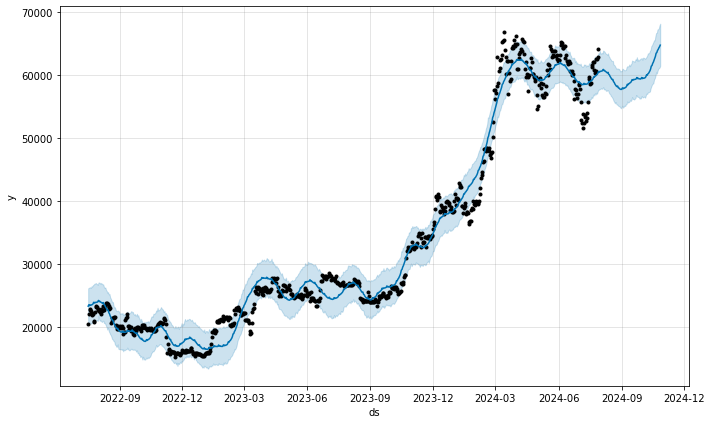

In [26]:
import matplotlib.pyplot as plt 
fig1 = m.plot(forecast)


/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

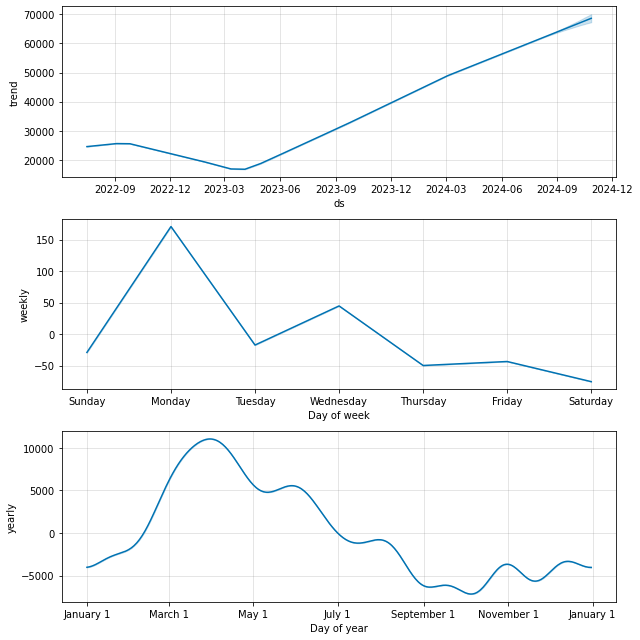

In [27]:
fig2 = m.plot_components(forecast)
